In [ ]:
import ipywidgets as widgets
import IPython.display as display

style = {'description_width': 'initial'}

In [ ]:
#Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [ ]:
file_path = '/content/iris.data'

df = pd.read_csv(file_path, names=['sepal length', 'sepal width',
                                   'petal length', 'petal width',
                                   'Species'])
df

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))
print("*******************************")
print("The classes in this dataset: {}".format(df.Species.unique()))

The dataset has 150 rows and 5 columns
*******************************
The classes in this dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#Since it is a binary classification problem we will remove one of the classes from the datasets
index_names = df[df['Species']== 'Iris-setosa'].index
df.drop(index_names, inplace=True)
target = df['Species']

df

,sepal length,sepal width,petal length,petal width,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print("The classes in this dataset: {}".format(df.Species.unique()))
#We have two only two class labels now

The classes in this dataset: ['Iris-versicolor' 'Iris-virginica']


In [ ]:
#setting up ipywidget for visualtization
wig_col = widgets.Dropdown(
                options=[col for col in df.columns.tolist() if col.startswith(('sepal', 'petal'))],
                description='Choose a Column to Plot vs. Attributes',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

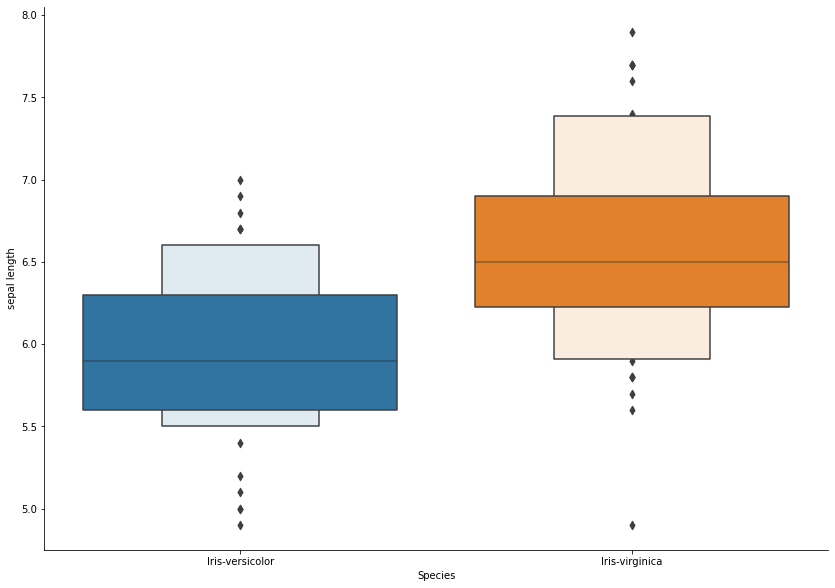

In [ ]:
display.display(wig_col)

sns.catplot(x="Species", y=wig_col.value, kind="boxen", data=df, height=8.27, aspect=11.7/8.27); 
#You can change the attribute you visualize by choice!

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

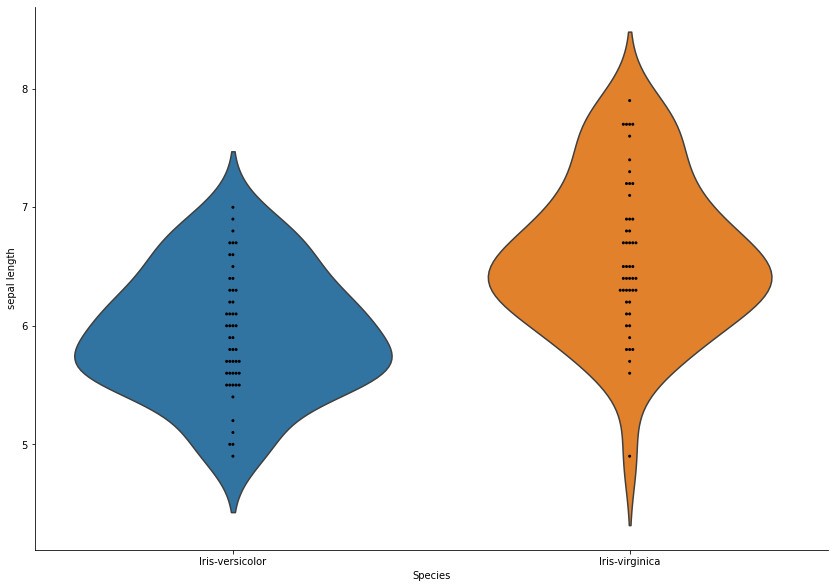

In [ ]:
g = sns.catplot(x="Species", y=wig_col.value, kind="violin", inner=None, data=df, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Species", y=wig_col.value, color="k", size=3, data=df, ax=g.ax);

display.display(wig_col)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
#We assign 1 and -1 to the two class labels
label_map = {'Iris-versicolor':1,'Iris-virginica':-1}
y = target.map(label_map)
x = df.drop(columns=['Species'])

In [ ]:
#As you can see in above df, the instances of the same class label are one after the other.
#Training on this tend to add more bias.
#The data needs to be shuffled.
x,y = shuffle(x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(80,1)
y_test = y_test.reshape(20,1)

In [ ]:
train_f1 = x_train[:,0]
train_f2 = x_train[:,1]
train_f3 = x_train[:,2]
train_f4 = x_train[:,3]
train_f1 = train_f1.reshape(80,1)
train_f2 = train_f2.reshape(80,1)
train_f3 = train_f3.reshape(80,1)
train_f4 = train_f4.reshape(80,1)

In [ ]:
w1 = np.zeros((80,1))
w2 = np.zeros((80,1))
w3 = np.zeros((80,1))
w4 = np.zeros((80,1))


In [ ]:
train_f1[0]

array([7.])

In [ ]:
epochs = 1
alpha = 0.0001

while(epochs<10000):
  y = w1*train_f1 + w2*train_f2 + w3*train_f3 + w4*train_f4
  prod = y*y_train 
  count = 0

  for val in prod:
    if (val>=1):
      cost = 0
      w1 = w1 - alpha*(2*1/epochs*w1)
      w2 = w2 - alpha*(2*1/epochs*w2)
      w3 = w3 - alpha*(2*1/epochs*w3)
      w4 = w4 - alpha*(2*1/epochs*w4)
    else:
      cost = 1 - val 
      w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
      w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
      w3 = w3 + alpha * (train_f3[count] * y_train[count] - 2 * 1/epochs * w3)
      w4 = w4 + alpha * (train_f4[count] * y_train[count] - 2 * 1/epochs * w4)
    count += 1
  epochs += 1

print(epochs)

10000


In [ ]:

from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(20,80))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)
w3 = np.delete(w3,index)
w4 = np.delete(w4,index)

w1 = w1.reshape(20,1)
w2 = w2.reshape(20,1)
w3 = w3.reshape(20,1)
w4 = w4.reshape(20,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]
test_f3 = x_test[:,2]
test_f4 = x_test[:,3]

test_f1 = test_f1.reshape(20,1)
test_f2 = test_f2.reshape(20,1)
test_f3 = test_f3.reshape(20,1)
test_f4 = test_f4.reshape(20,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2 + w3 * test_f3 + w4 * test_f4
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))


0.95


### Detalied EDA